# Business Understanding

A company like retail stores, restaurants, or hospitals want to predict queue waiting time. So its can improve satisfaction customer and increase efficiency

# Data Understanding

* arrival_time --> time when customer arrival
* start_time --> time when customer start
* finish_time --> time when customer finish
* wait_time --> time when customer waiting
* queue_length --> number of queue customer

## Download Dataset

In [1]:
# install library

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# create folder 

!mkdir ~/.kaggle

In [3]:
# copy kaggle.json to kaggle

!cp kaggle.json ~/.kaggle

In [4]:
# grant access

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download dataset

!kaggle datasets download -d sanjeebtiwary/queue-waiting-time-prediction

  0% 0.00/5.91k [00:00<?, ?B/s]
100% 5.91k/5.91k [00:00<00:00, 3.80MB/s]


In [6]:
# unzip dataset

!unzip /content/queue-waiting-time-prediction.zip

Archive:  /content/queue-waiting-time-prediction.zip
  inflating: queue_data.csv          


# Data Preparation

## Exploration Data Analysis

In [81]:
# import library

import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from datetime import timezone

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
# load dataset

df = pd.read_csv("/content/queue_data.csv")

In [83]:
# display data head

df.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28


In [84]:
# check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [85]:
# check data describe

df.describe()

,wait_time,queue_length
count,560.000000,560.000000
mean,10.107911,32.132143
std,5.032406,12.418048
min,-2.930000,2.000000
25%,6.527500,24.750000
50%,10.120000,30.000000
75%,13.322500,45.000000
max,26.980000,50.000000


In [86]:
df.describe()

,wait_time,queue_length
count,560.000000,560.000000
mean,10.107911,32.132143
std,5.032406,12.418048
min,-2.930000,2.000000
25%,6.527500,24.750000
50%,10.120000,30.000000
75%,13.322500,45.000000
max,26.980000,50.000000


## Type Conversion

In [87]:
# check data type

df.dtypes

arrival_time     object
start_time       object
finish_time      object
wait_time       float64
queue_length      int64
dtype: object

In [88]:
df.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28


In [89]:
# change data type

df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M').astype(int) // 10**9
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M').astype(int) // 10**9
df['finish_time'] = pd.to_datetime(df['finish_time'], format='%Y-%m-%d %H:%M:%S').astype(int) // 10**9

In [90]:
df.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,1680135000,1680135000,1680135764,12.68,28
1,1680135000,1680135360,1680135953,9.82,28
2,1680135000,1680135360,1680135948,9.74,28
3,1680135000,1680135240,1680136043,13.32,28
4,1680135000,1680135300,1680136281,16.29,28


## Remove Duplicates

In [91]:
# check duplicates

num_duplicates = df.duplicated().sum()

# print number of duplicates

print("Number of duplicates : ", num_duplicates)
print("Number rows before remove duplicates : ", len(df))

# drop duplicates

df.drop_duplicates(inplace=True)

# print
print("Number rows after remove duplicates : ", len(df))

Number of duplicates :  1
Number rows before remove duplicates :  560
Number rows after remove duplicates :  559


## Handle missing values

In [92]:
# check missing values

df.isna().sum()

arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
dtype: int64

## Handle Outlier

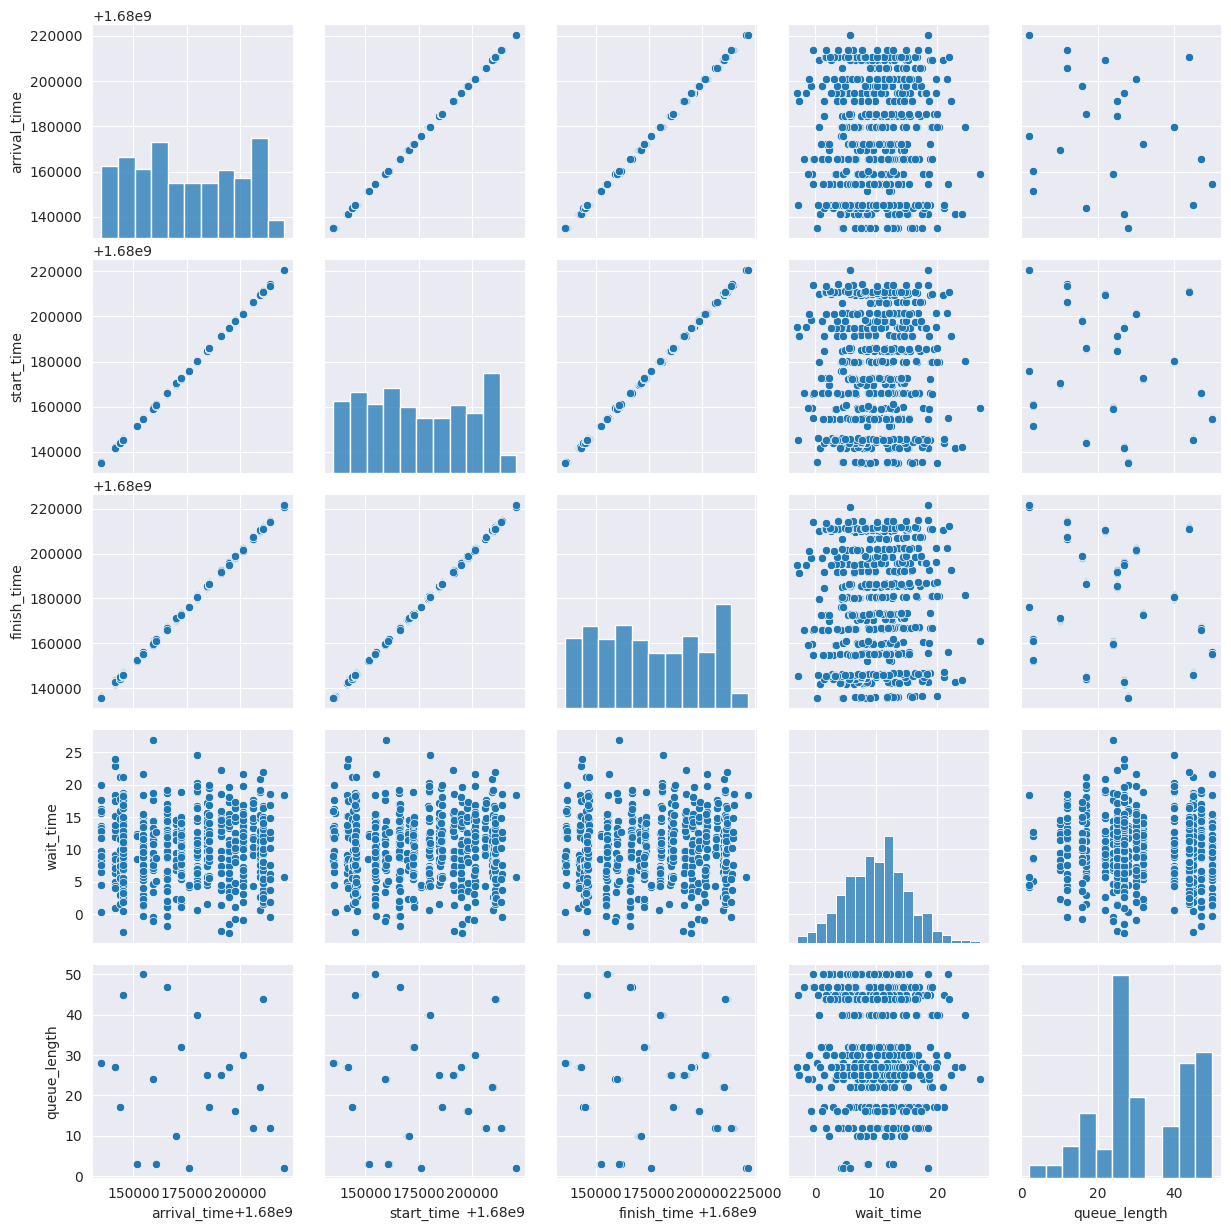

In [93]:
# analysis outlier using visualization

sns.pairplot(df, kind='scatter')

In [95]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [96]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Modeling

<Axes: >

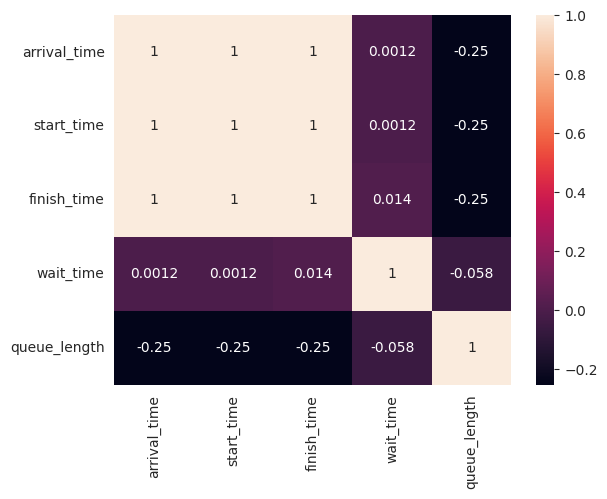

In [116]:
# sns.heatmap(df.corr(), annot=True)

In [117]:
X = df[['arrival_time','start_time', 'finish_time']]
y = df['wait_time']

In [120]:
random_states = [0, 42, 123, 456, 789]

In [121]:
for random_state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

  # create model

  model = LinearRegression()

  # set hyperparameter to tune

  param_grid = {'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [-1,1],
                'positive' : [True, False]}

  # perform grid search

  grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2')
  grid_search.fit(X_train, y_train)

  # print best parameter

  print('Best Hyperparameter : ', grid_search.best_params_)

  # use the best hyperparameter to train

  lin_reg_best = LinearRegression(**grid_search.best_params_)
  lin_reg_best.fit(X_train, y_train)

  y_pred = lin_reg_best.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("Pakai Data Test")
  print('Random State : ', random_state)
  print('MSE : ', mse)
  print("R-Squared : ", r2)
  print("\n")

Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  0
MSE :  0.07119353187232005
R-Squared :  0.9972745038724327


Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  42
MSE :  0.07425719414770562
R-Squared :  0.9969074057486103


Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  123
MSE :  0.07373773069199094
R-Squared :  0.9972343584139132


Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  456
MSE :  0.08003299787504112
R-Squared :  0.9967494077065218


Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  789
MSE :  0.07122762498767278
R-Squared :  0.9976818314359357




In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 789)

# create model

model = LinearRegression()

# set hyperparameter to tune

param_grid = {'copy_X' : [True, False],
              'fit_intercept' : [True, False],
              'n_jobs' : [-1,1],
              'positive' : [True, False]}

# perform grid search

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)

# print best parameter

print('Best Hyperparameter : ', grid_search.best_params_)

# use the best hyperparameter to train

lin_reg_best = LinearRegression(**grid_search.best_params_)
lin_reg_best.fit(X_train, y_train)

y_pred = lin_reg_best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Pakai Data Test")
print('Random State : ', random_state)
print('MSE : ', mse)
print("R-Squared : ", r2)
print("\n")

Best Hyperparameter :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Pakai Data Test
Random State :  789
MSE :  0.07122762498767278
R-Squared :  0.9976818314359357




In [122]:
# print(lin_reg_best.coef_)

[ 8.33123301e-07 -1.66154039e-02  1.66096493e-02]
